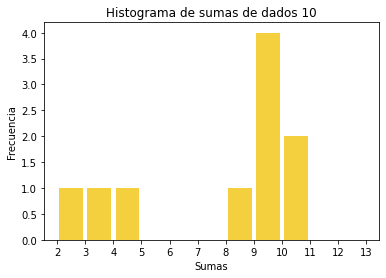

In [ ]:
import random
import matplotlib.pyplot as plot


def sumaValores(a,b):
  c = a+b
  frecuenciaSuma(c)
  return c

vec = []
def frecuenciaSuma(c):
  vec.append(c)
  

def graficarHistograma(repeticiones):
  for i in range(0,repeticiones):
    dadoA = random.randint(1,6)
    dadoB = random.randint(1,6)
    sumaValores(dadoA,dadoB)
  mapa_vector = {}

  for suma in vec:
	  if suma in mapa_vector:
		  mapa_vector[suma] += 1
	  else:
		  mapa_vector[suma] = 1
  intervalos = range(min(vec), 12 + 2) 
  plot.hist(x=vec, bins=intervalos, color='#F4D03F', rwidth=0.85)
  w1 = 'Histograma de sumas de dados '
  w2 = str(repeticiones)
  plot.title(w1 + w2)
  plot.xlabel('Sumas')
  plot.ylabel('Frecuencia')
  plot.xticks(intervalos)
  plot.show() 

graficarHistograma(10)

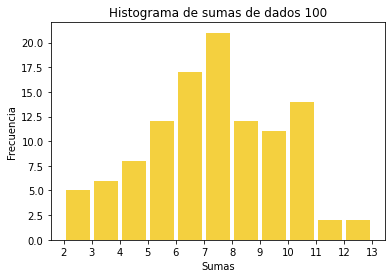

In [ ]:
graficarHistograma(100)

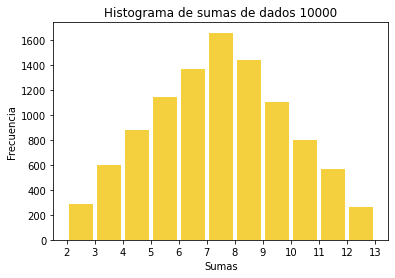

In [ ]:
graficarHistograma(10000)

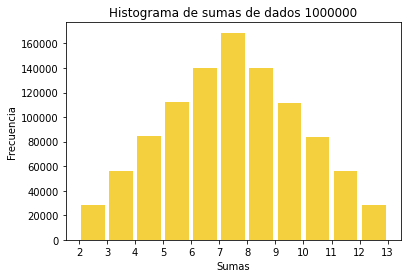

In [ ]:
graficarHistograma(1000000)

In [ ]:
# Python code to implement Conway's Game Of Life
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# setting up the values for the grid
ON = 255
OFF = 0
vals = [ON, OFF]

def randomGrid(N):

	"""returns a grid of NxN random values"""
	return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

def addGlider(i, j, grid):

	"""adds a glider with top left cell at (i, j)"""
	glider = np.array([[0, 0, 255],
					[255, 0, 255],
					[0, 255, 255]])
	grid[i:i+3, j:j+3] = glider

def addGosperGliderGun(i, j, grid):

	"""adds a Gosper Glider Gun with top left
	cell at (i, j)"""
	gun = np.zeros(11*38).reshape(11, 38)

	gun[5][1] = gun[5][2] = 255
	gun[6][1] = gun[6][2] = 255

	gun[3][13] = gun[3][14] = 255
	gun[4][12] = gun[4][16] = 255
	gun[5][11] = gun[5][17] = 255
	gun[6][11] = gun[6][15] = gun[6][17] = gun[6][18] = 255
	gun[7][11] = gun[7][17] = 255
	gun[8][12] = gun[8][16] = 255
	gun[9][13] = gun[9][14] = 255

	gun[1][25] = 255
	gun[2][23] = gun[2][25] = 255
	gun[3][21] = gun[3][22] = 255
	gun[4][21] = gun[4][22] = 255
	gun[5][21] = gun[5][22] = 255
	gun[6][23] = gun[6][25] = 255
	gun[7][25] = 255

	gun[3][35] = gun[3][36] = 255
	gun[4][35] = gun[4][36] = 255

	grid[i:i+11, j:j+38] = gun

def update(frameNum, img, grid, N):

	# copy grid since we require 8 neighbors
	# for calculation and we go line by line
	newGrid = grid.copy()
	for i in range(N):
		for j in range(N):

			# compute 8-neghbor sum
			# using toroidal boundary conditions - x and y wrap around
			# so that the simulaton takes place on a toroidal surface.
			total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
						grid[(i-1)%N, j] + grid[(i+1)%N, j] +
						grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
						grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)

			# apply Conway's rules
			if grid[i, j] == ON:
				if (total < 2) or (total > 3):
					newGrid[i, j] = OFF
			else:
				if total == 3:
					newGrid[i, j] = ON

	# update data
	img.set_data(newGrid)
	grid[:] = newGrid[:]
	return img,

# main() function
def main():

	# Command line args are in sys.argv[1], sys.argv[2] ..
	# sys.argv[0] is the script name itself and can be ignored
	# parse arguments
	parser = argparse.ArgumentParser(description="Runs Conway's Game of Life simulation.")

	# add arguments
	parser.add_argument('--grid-size', dest='N', required=False)
	parser.add_argument('--mov-file', dest='movfile', required=False)
	parser.add_argument('--interval', dest='interval', required=False)
	parser.add_argument('--glider', action='store_true', required=False)
	parser.add_argument('--gosper', action='store_true', required=False)
	args = parser.parse_args()
	
	# set grid size
	N = 100
	if args.N and int(args.N) > 8:
		N = int(args.N)
		
	# set animation update interval
	updateInterval = 50
	if args.interval:
		updateInterval = int(args.interval)

	# declare grid
	grid = np.array([])

	# check if "glider" demo flag is specified
	if args.glider:
		grid = np.zeros(N*N).reshape(N, N)
		addGlider(1, 1, grid)
	elif args.gosper:
		grid = np.zeros(N*N).reshape(N, N)
		addGosperGliderGun(10, 10, grid)

	else: # populate grid with random on/off -
			# more off than on
		grid = randomGrid(N)

	# set up animation
	fig, ax = plt.subplots()
	img = ax.imshow(grid, interpolation='nearest')
	ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ),
								frames = 10,
								interval=updateInterval,
								save_count=50)

	# # of frames?
	# set output file
	if args.movfile:
		ani.save(args.movfile, fps=30, extra_args=['-vcodec', 'libx264'])

	plt.show()

# call main
if __name__ == '__main__':
	main()


usage: ipykernel_launcher.py [-h] [--grid-size N] [--mov-file MOVFILE]
                             [--interval INTERVAL] [--glider] [--gosper]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-8a0143bd-b755-423b-bad6-4558d30ac2b3.json


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
